## ECG Heartbeat Categorization

> This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# importing dataset from drive

data = pd.read_csv("/content/gdrive/My Drive/ecgdatasets/mitbih_train.csv", header=None)
df = pd.DataFrame(data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# showing column wise %ge of NaN values they contains 
null_col = []

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)
  if df[i].isna().mean()*100 > 0:
    null_col.append(i)


0 	-	 0.0
1 	-	 0.0
2 	-	 0.0
3 	-	 0.0
4 	-	 0.0
5 	-	 0.0
6 	-	 0.0
7 	-	 0.0
8 	-	 0.0
9 	-	 0.0
10 	-	 0.0
11 	-	 0.0
12 	-	 0.0
13 	-	 0.0
14 	-	 0.0
15 	-	 0.0
16 	-	 0.0
17 	-	 0.0
18 	-	 0.0
19 	-	 0.0
20 	-	 0.0
21 	-	 0.0
22 	-	 0.0
23 	-	 0.0
24 	-	 0.0
25 	-	 0.0
26 	-	 0.0
27 	-	 0.0
28 	-	 0.0
29 	-	 0.0
30 	-	 0.0
31 	-	 0.0
32 	-	 0.0
33 	-	 0.0
34 	-	 0.0
35 	-	 0.0
36 	-	 0.0
37 	-	 0.0
38 	-	 0.0
39 	-	 0.0
40 	-	 0.0
41 	-	 0.0
42 	-	 0.0
43 	-	 0.0
44 	-	 0.0
45 	-	 0.0
46 	-	 0.0
47 	-	 0.0
48 	-	 0.0
49 	-	 0.0
50 	-	 0.0
51 	-	 0.0
52 	-	 0.0
53 	-	 0.0
54 	-	 0.0
55 	-	 0.0
56 	-	 0.0
57 	-	 0.0
58 	-	 0.0
59 	-	 0.0
60 	-	 0.0
61 	-	 0.0
62 	-	 0.0
63 	-	 0.0
64 	-	 0.0
65 	-	 0.0
66 	-	 0.0
67 	-	 0.0
68 	-	 0.0
69 	-	 0.0
70 	-	 0.0
71 	-	 0.0
72 	-	 0.0
73 	-	 0.0
74 	-	 0.0
75 	-	 0.0
76 	-	 0.0
77 	-	 0.0
78 	-	 0.0
79 	-	 0.0
80 	-	 0.0
81 	-	 0.0
82 	-	 0.0
83 	-	 0.0
84 	-	 0.0
85 	-	 0.0
86 	-	 0.0
87 	-	 0.0
88 	-	 0.0
89 	-	 0.0
90 	-	 0.0
91 	-	 0.

> Since data does'nt contain any null values, we can move further

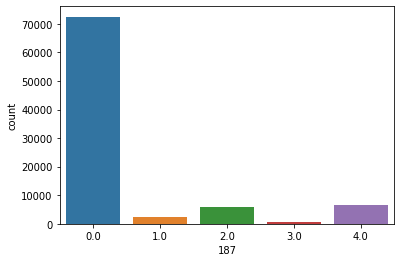

In [7]:
classes = []
sns.countplot(x=187, data = df) 

> Here this bar graph easily shows how data is imbalanced. More than 80% data is in class 0. So, first, we have to balance th data in to get more precise predictions.

> For balancing the data I'm using undersampling in which we will reduce the rows of class 0 to the number compareble to others/

In [8]:
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]
class_0 = df[df[187]==0.0].sample(n = 8000)

In [9]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [10]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
6267,1.000000,0.855422,0.644578,0.421687,0.240964,0.198795,0.219880,0.262048,0.262048,0.271084,0.268072,0.286145,0.274096,0.289157,0.277108,0.298193,0.289157,0.304217,0.307229,0.340361,0.337349,0.370482,0.376506,0.415663,0.430723,0.460843,0.478916,0.515060,0.530120,0.557229,0.569277,0.575301,0.518072,0.475904,0.403614,0.376506,0.343374,0.346386,0.316265,0.331325,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40627,1.000000,0.827511,0.213974,0.026201,0.183406,0.152838,0.078603,0.076419,0.074236,0.074236,0.067686,0.054585,0.065502,0.076419,0.069869,0.054585,0.061135,0.069869,0.063319,0.048035,0.056769,0.072052,0.069869,0.065502,0.074236,0.096070,0.096070,0.100437,0.117904,0.141921,0.155022,0.165939,0.183406,0.198690,0.205240,0.216157,0.229258,0.244541,0.248908,0.229258,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52296,1.000000,0.787440,0.159420,0.038647,0.106280,0.111111,0.091787,0.178744,0.164251,0.164251,0.178744,0.256039,0.323671,0.318841,0.314010,0.323671,0.352657,0.338164,0.309179,0.328502,0.342995,0.347826,0.328502,0.357488,0.371981,0.362319,0.367150,0.386473,0.396135,0.415459,0.449275,0.454106,0.492754,0.478261,0.497585,0.516908,0.531401,0.531401,0.516908,0.521739,...,0.0,0.0,0.086957,0.048309,0.135266,0.173913,0.10628,0.135266,0.236715,0.275362,0.2657,0.270531,0.294686,0.275362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33657,1.000000,0.990991,0.821622,0.533333,0.475676,0.535135,0.500901,0.522523,0.526126,0.526126,0.526126,0.560360,0.553153,0.562162,0.562162,0.572973,0.569369,0.587387,0.589189,0.605405,0.646847,0.600000,0.574775,0.590991,0.563964,0.592793,0.603604,0.607207,0.616216,0.618018,0.646847,0.661261,0.670270,0.625225,0.598198,0.590991,0.610811,0.634234,0.654054,0.643243,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50196,0.977778,0.788889,0.377778,0.222222,0.194444,0.255556,0.222222,0.222222,0.244444,0.255556,0.244444,0.272222,0.244444,0.305556,0.305556,0.272222,0.250000,0.333333,0.361111,0.361111,0.338889,0.366667,0.372222,0.416667,0.394444,0.483333,0.500000,0.416667,0.450000,0.555556,0.505556,0.483333,0.433333,0.416667,0.311111,0.300000,0.344444,0.316667,0.205556,0.272222,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


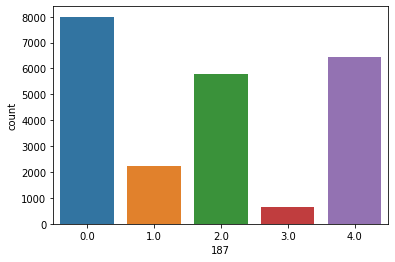

In [11]:
sns.countplot(x=187, data = new_df) 

> Now for visualising each class, here is plot of any random sample of hearbeat in each class.

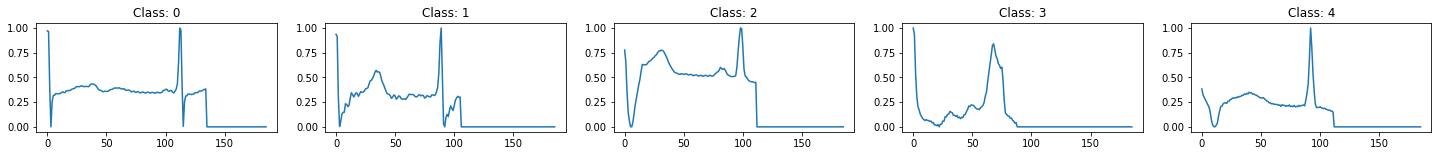

In [12]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(new_df[new_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))


In [13]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size = 0.1)

In [14]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [16]:
clf = Sequential()

clf.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
clf.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
clf.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

clf.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
clf.add(Dropout(0.5))

clf.add(Flatten())

clf.add(Dense(units = 512, activation='relu'))
clf.add(Dense(units = 1024, activation='relu'))

clf.add(Dense(units = 5, activation='softmax'))


In [17]:
clf.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = clf.fit(X_train, y_train, epochs = 10)

Epoch 1/10
650/650 [==============================] - 3s 4ms/step - loss: 0.3774 - accuracy: 0.8687
Epoch 2/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1957 - accuracy: 0.9337
Epoch 3/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1438 - accuracy: 0.9517
Epoch 4/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1211 - accuracy: 0.9596
Epoch 5/10
650/650 [==============================] - 3s 4ms/step - loss: 0.1021 - accuracy: 0.9638
Epoch 6/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0824 - accuracy: 0.9703
Epoch 7/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0712 - accuracy: 0.9739
Epoch 8/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0631 - accuracy: 0.9774
Epoch 9/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9801
Epoch 10/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0553 - accuracy: 0.9803

In [19]:
# Prediction

y_pred = clf.predict(X_test)

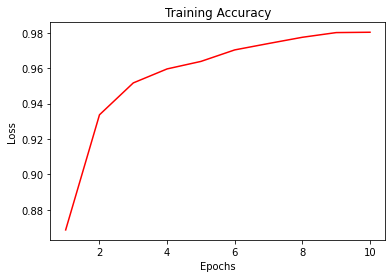

In [20]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

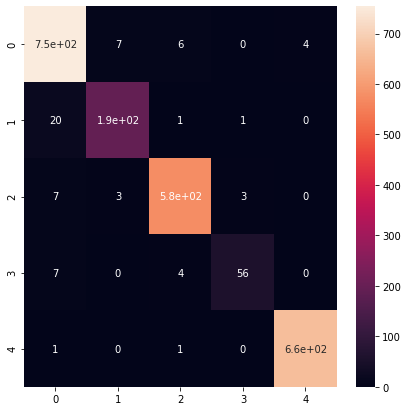

In [21]:
from sklearn.metrics import confusion_matrix

y_lbl = [np.where(i == np.max(i))[0][0] for i in y_pred]
mat = confusion_matrix(y_test, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [22]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(y_lbl, y_test)))


Accuracy score of the predictions: 0.9718492854049372


> As we can see above CNN got accuracy of 96.6%, now we can predict the vaalues for our test dataset.

***

In [24]:
test_data = pd.read_csv("/content/gdrive/My Drive/ecgdatasets/mitbih_test.csv", header=None)
test_df = pd.DataFrame(test_data)

In [25]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


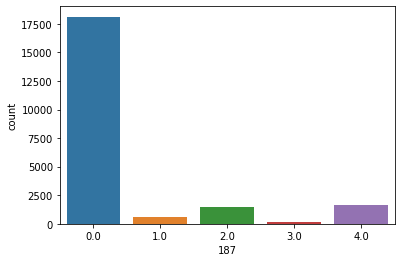

In [26]:
classes = []
sns.countplot(x=187, data = test_df) 

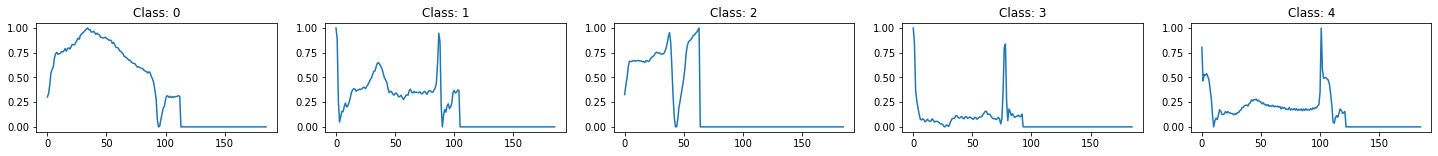

In [27]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(test_df[test_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))


In [28]:
test_X = test_df.drop([187], axis=1) 
test_y = test_df[187]

test_X = np.array(test_X).reshape(test_X.shape[0], test_X.shape[1], 1)

In [29]:
test_pred_y = clf.predict(test_X)

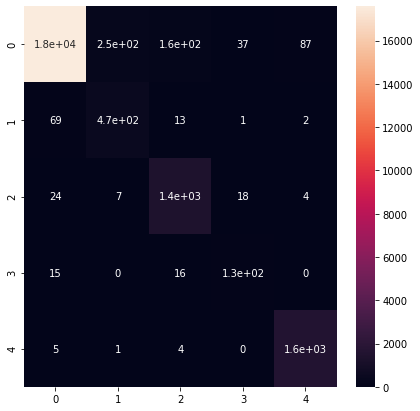

In [30]:
from sklearn.metrics import confusion_matrix

test_lbl_y = [np.where(i == np.max(i))[0][0] for i in test_pred_y]
mat = confusion_matrix(test_y, test_lbl_y)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [31]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(test_lbl_y, test_y)))


Accuracy score of the predictions: 0.9674310250319752


> And here our CNN got us 96.5% accuracy on test dataset